## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Constants

In [2]:
n = 5000 # Загальна кількість відліків
N = 4096 # довжина інтервалу

## Signal generation

In [3]:
x = np.zeros(n) # Масив для зберігання значень процесу

In [4]:
# Згенерувати нормальний білий шум
theta = np.random.randn(n)

In [5]:
# Початкові умови
x[0] = 0
x[1] = 0

In [6]:
# Згенерувати процес
for i in range(2, n):
    x[i] = theta[i] + x[i-1] - 0.5*x[i-2]

In [7]:
# видалення перехідного процесу
x = x[3:N+3]

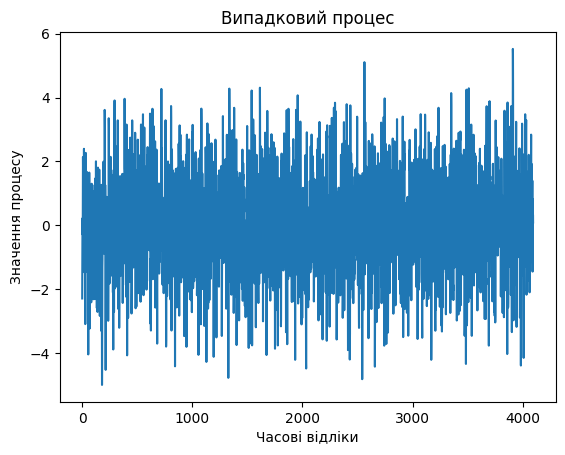

In [8]:
plt.plot(x)
plt.title('Випадковий процес')
plt.xlabel('Часові відліки')
plt.ylabel('Значення процесу')
plt.show()

## No window

In [9]:
M_values = [128, 512, 1024]

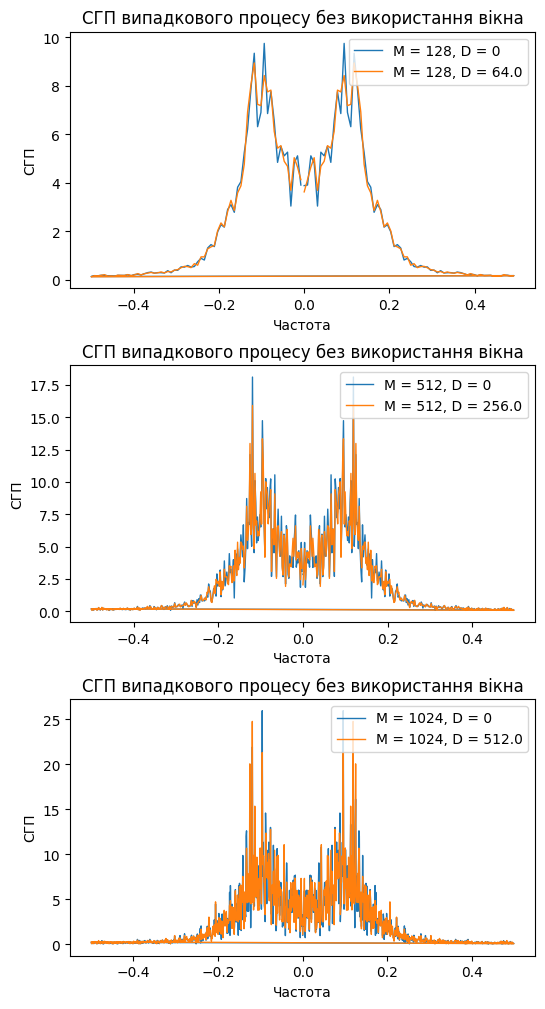

In [10]:
figs, axes = plt.subplots(len(M_values),1,figsize=(6,12))
for i, M in enumerate(M_values):
    ax = axes[i]
    ax.set_title('СГП випадкового процесу без використання вікна')
    # Оцінка СГП методом Welch без використання вікна
    D = 0
    f, S = signal.welch(x, window='boxcar', nperseg=M, noverlap=D, return_onesided=False, detrend=False, scaling='density')
    ax.plot(f, S, label=f'M = {M}, D = {D}', linewidth=1)
    D = M/2
    f, S = signal.welch(x, window='boxcar', nperseg=M, noverlap=D, return_onesided=False, detrend=False, scaling='density')
    ax.plot(f, S, label=f'M = {M}, D = {D}', linewidth=1)
    ax.legend()
    ax.set_xlabel('Частота')
    ax.set_ylabel('СГП')

figs.subplots_adjust(hspace=0.3)    
plt.show()

## Hamming

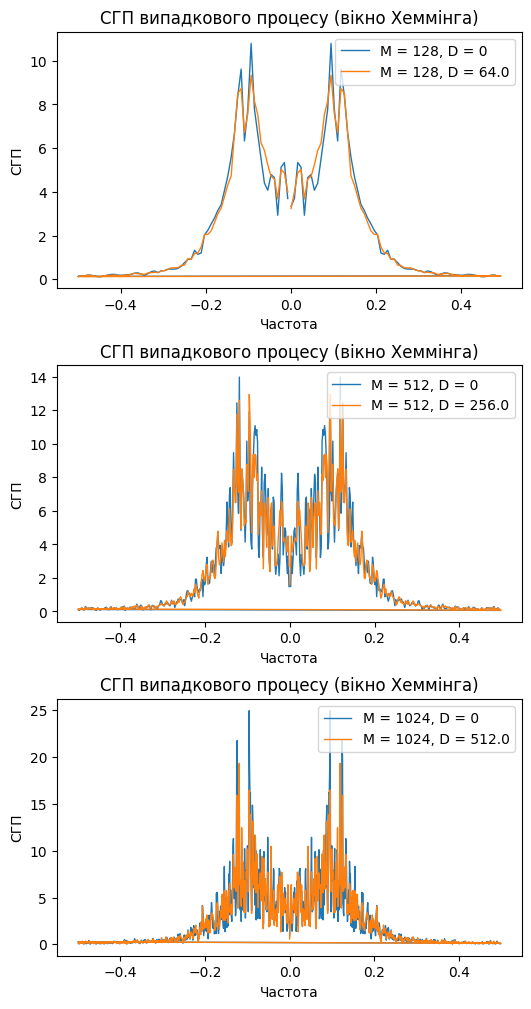

In [11]:
figs, axes = plt.subplots(len(M_values),1,figsize=(6,12))
for i, M in enumerate(M_values):
    ax = axes[i]
    ax.set_title('СГП випадкового процесу (вікно Хеммінга)')
    # Оцінка СГП методом Welch без використання вікна
    D = 0
    f, S = signal.welch(x, window='hamming', nperseg=M, noverlap=D, return_onesided=False, detrend=False, scaling='density')
    ax.plot(f, S, label=f'M = {M}, D = {D}', linewidth=1)
    D = M/2
    f, S = signal.welch(x, window='hamming', nperseg=M, noverlap=D, return_onesided=False, detrend=False, scaling='density')
    ax.plot(f, S, label=f'M = {M}, D = {D}', linewidth=1)
    ax.legend()
    ax.set_xlabel('Частота')
    ax.set_ylabel('СГП')

figs.subplots_adjust(hspace=0.3)  
plt.show()

## Kaiser

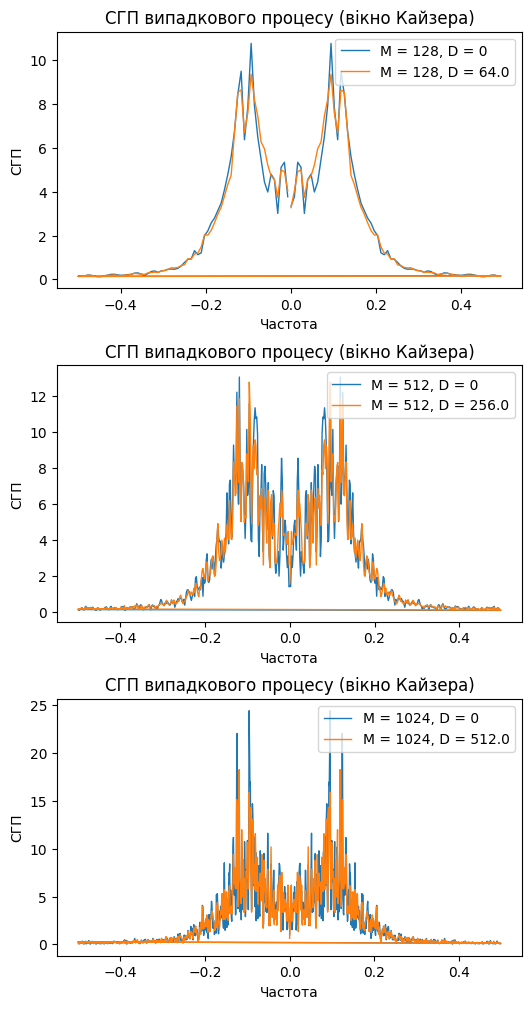

In [12]:
figs, axes = plt.subplots(len(M_values),1,figsize=(6,12))
for i, M in enumerate(M_values):
    ax = axes[i]
    ax.set_title('СГП випадкового процесу (вікно Кайзера)')
    # Оцінка СГП методом Welch без використання вікна
    D = 0
    f, S = signal.welch(x, window=('kaiser', 6), nperseg=M, noverlap=D, return_onesided=False, detrend=False, scaling='density')
    ax.plot(f, S, label=f'M = {M}, D = {D}', linewidth=1)
    D = M/2
    f, S = signal.welch(x, window=('kaiser', 6), nperseg=M, noverlap=D, return_onesided=False, detrend=False, scaling='density')
    ax.plot(f, S, label=f'M = {M}, D = {D}', linewidth=1)
    ax.legend()
    ax.set_xlabel('Частота')
    ax.set_ylabel('СГП')

figs.subplots_adjust(hspace=0.3)  
plt.show()

## Blackman

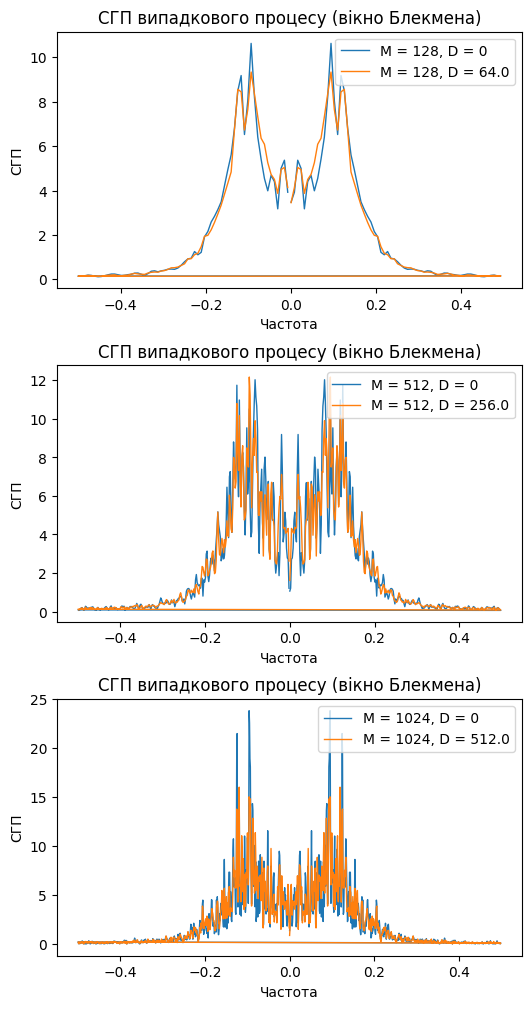

In [13]:
figs, axes = plt.subplots(len(M_values),1,figsize=(6,12))
for i, M in enumerate(M_values):
    ax = axes[i]
    ax.set_title('СГП випадкового процесу (вікно Блекмена)')
    # Оцінка СГП методом Welch без використання вікна
    D = 0
    f, S = signal.welch(x, window='blackman', nperseg=M, noverlap=D, return_onesided=False, detrend=False, scaling='density')
    ax.plot(f, S, label=f'M = {M}, D = {D}', linewidth=1)
    D = M/2
    f, S = signal.welch(x, window='blackman', nperseg=M, noverlap=D, return_onesided=False, detrend=False, scaling='density')
    ax.plot(f, S, label=f'M = {M}, D = {D}', linewidth=1)
    ax.legend()
    ax.set_xlabel('Частота')
    ax.set_ylabel('СГП')

figs.subplots_adjust(hspace=0.3)  
plt.show()

## Додавання періодичної складової

In [14]:
t = np.arange(0, 5*np.pi, N)
y = 0.1*np.sin(2*np.pi*0.15*t)

In [15]:
x += y

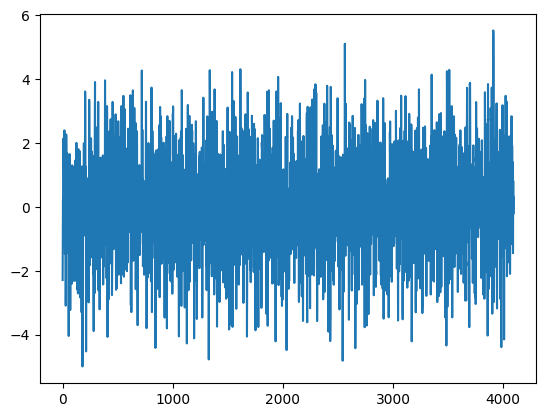

In [16]:
plt.plot(x)
plt.show()

## СГП

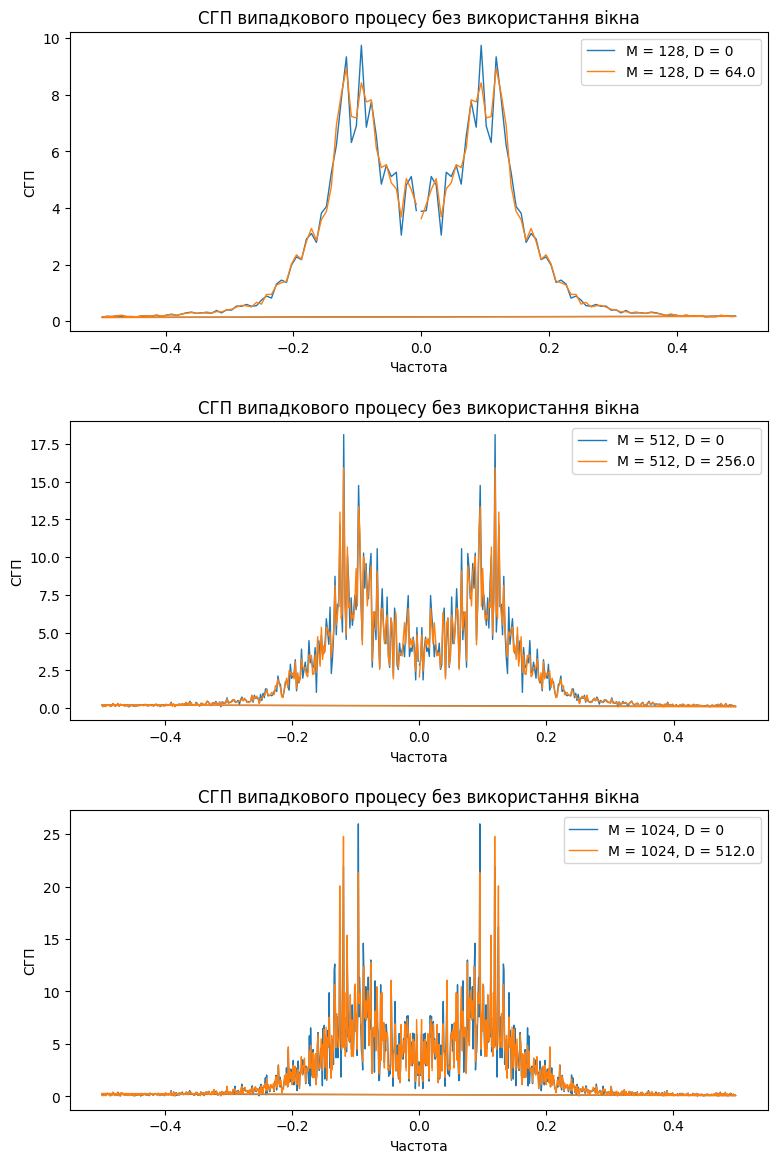

In [17]:
figs, axes = plt.subplots(len(M_values),1,figsize=(9,14))
for i, M in enumerate(M_values):
    ax = axes[i]
    ax.set_title('СГП випадкового процесу без використання вікна')
    # Оцінка СГП методом Welch без використання вікна
    D = 0
    f, S = signal.welch(x, window='boxcar', nperseg=M, noverlap=D, return_onesided=False, detrend=False, scaling='density')
    ax.plot(f, S, label=f'M = {M}, D = {D}', linewidth=1)
    D = M/2
    f, S = signal.welch(x, window='boxcar', nperseg=M, noverlap=D, return_onesided=False, detrend=False, scaling='density')
    ax.plot(f, S, label=f'M = {M}, D = {D}', linewidth=1)
    ax.legend()
    ax.set_xlabel('Частота')
    ax.set_ylabel('СГП')

figs.subplots_adjust(hspace=0.3)    
plt.show()